In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [2]:
x_train, y_train, x_test, y_test = ([] for x in range(4))

In [3]:
def convert(x):
    return bin(x)[2:].zfill(40)

In [4]:
with open('../src/data_train.txt','r') as pixels, open('../src/label_train.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = list(map(int,''.join(l2)))
        lb = int(labels.readline())
        x_train.append(px)
        y_train.append(lb)
with open('../src/data_test.txt','r') as pixels, open('../src/label_test.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = list(map(int,''.join(l2)))
        lb = int(labels.readline())
        x_test.append(px)
        y_test.append(lb)
print(len(x_train),len(y_train),len(x_test),len(y_test))

60000 60000 10000 10000


In [5]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [6]:
train_count, features = x_train.shape
test_count = x_test.shape[0]

In [21]:
# first model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(1600,)))
model.add(Dropout(rate=0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               204928    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 213,834
Trainable params: 213,834
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
47/47 [==============================] - 3s 54ms/step - loss: 0.8549 - accuracy: 0.7422 - val_loss: 0.3062 - val_accuracy: 0.9107
Epoch 2/100
47/47 [==============================] - 2s 40ms/step - loss: 0.3318 - accuracy: 0.9028 - val_loss: 0.2188 - val_accuracy: 0.9383
Epoch 3/100
47/47 [==============================] - 2s 35ms/step - loss: 0.2483 - accuracy: 0.9276 - val_loss: 0.1764 - val_accuracy: 0.9497
Epoch 4/100
47/47 [==============================] - 2s 36ms/step - loss: 0.2003 - accuracy: 0.9411 - val_loss: 0.1532 - val_accuracy: 0.9551
Epoch 5/100
47/47 [==============================] - 2s 42ms/step - loss: 0.1678 - accuracy: 0.9503 - val_loss: 0.1386 - val_accuracy: 0.9584
Epoch 6/100
47/47 [==============================] - 2s 41ms/step - loss: 0.1471 - accuracy: 0.9570 - val_loss: 0.1243 - val_accuracy: 0.9632
Epoch 7/100
47/47 [==============================] - 2s 39ms/step - loss: 0.1267 - accuracy: 0.9622 - val_loss: 0.1166 - val_accuracy: 0.9643
Epoch 

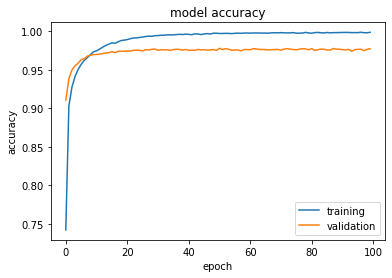

Test loss: 0.112
Test accuracy: 0.979


In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1024, epochs=100, shuffle=True, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, batch_size=1024)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [9]:
wList = model.get_weights()
wList[1] = np.reshape(wList[1], (1, wList[1].shape[0]))
wList[3] = np.reshape(wList[3], (1, wList[3].shape[0]))
wList[0].shape, wList[1].shape, wList[2].shape, wList[3].shape

((1600, 160), (1, 160), (160, 80), (1, 80))

In [10]:
a = np.random.rand(4,3)
a

array([[0.52633288, 0.79781019, 0.44142488],
       [0.34382392, 0.72944401, 0.67294535],
       [0.60343267, 0.90389384, 0.63711104],
       [0.91448962, 0.62933447, 0.98152573]])

In [11]:
a * (a < 0.5) / 0.5

array([[0.        , 0.        , 0.88284977],
       [0.68764785, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [13]:
# with open('text.txt','w') as g:
#     g.write('{')
#     for i in range(len(wList)):
#         g.write('{')
#         for j in range(wList[i].shape[0]):
#             g.write('{')
#             for k in range(wList[i][j].shape[0]):
#                 g.write(str(wList[i][j][k]))
#                 if k + 1 == wList[i][j].shape[0]: g.write('}')
#                 else: g.write(',')
#             if j + 1 == wList[i].shape[0]: g.write('}')
#             else: g.write(',')
#         if i + 1 == len(wList): g.write('}')
#         else: g.write(',')

In [14]:
wList = model.get_weights()
wList[1] = np.reshape(wList[1], (1, wList[1].shape[0]))
wList[3] = np.reshape(wList[3], (1, wList[3].shape[0]))
wList[5] = np.reshape(wList[5], (1, wList[5].shape[0]))

MXX = 100000
name = ['w1', 'b1', 'w2', 'b2','w3','b3']
with open('text.txt','w') as g:
    for i in range(len(wList)):
        g.write('ld v' + name[i] + '[' + str(wList[i].shape[0]) + '][' + str(wList[i].shape[1]) + '] =' + '{')
        for j in range(min(MXX,wList[i].shape[0])):
            g.write('{')
            for k in range(min(MXX,wList[i][j].shape[0])):
                g.write(str(wList[i][j][k]))
                if k + 1 == min(MXX,wList[i][j].shape[0]): g.write('}')
                else: g.write(',')
            if j + 1 == min(MXX,wList[i].shape[0]): g.write('}')
            else: g.write(',')
        g.write(';\n')
    g.write('\nMatrix ')
    for i in range(len(wList)):
        g.write(name[i] + '(' + str(wList[i].shape[0]) + ',' + str(wList[i].shape[1]) + ')')
        if i + 1 == len(wList): g.write(';')
        else: g.write(', ')
    g.write('\n')

In [23]:
wList = model.get_weights()
wList[1] = np.reshape(wList[1], (1, wList[1].shape[0]))
wList[3] = np.reshape(wList[3], (1, wList[3].shape[0]))
wList[5] = np.reshape(wList[5], (1, wList[5].shape[0]))

MXX = 100000
name = ['w1', 'b1', 'w2', 'b2','w3','b3']
with open('params.txt','w') as g:
    for i in range(len(wList)):
        for j in range(min(MXX,wList[i].shape[0])):
            for k in range(min(MXX,wList[i][j].shape[0])):
                g.write(str(wList[i][j][k]))
                if k + 1 == min(MXX,wList[i][j].shape[0]): g.write('\n')
                else: g.write(' ')
            if j + 1 == min(MXX,wList[i].shape[0]): g.write('\n')
            else: g.write(' ')
        g.write('\n')

In [16]:
for i in range(4):
    print(np.unique(wList[i]))

[-0.51754904 -0.45539743 -0.4437031  ...  0.3656878   0.38041222
  0.38910335]
[-0.14273882 -0.13065885 -0.11109908 -0.101748   -0.10004844 -0.09944563
 -0.09559857 -0.09087021 -0.08486159 -0.08222348 -0.08166708 -0.07909302
 -0.07136677 -0.07135327 -0.06750135 -0.06634451 -0.06591669 -0.06574912
 -0.06131806 -0.05938933 -0.05778539 -0.05735597 -0.0569664  -0.05661343
 -0.05584927 -0.05379893 -0.05344805 -0.05194208 -0.05173174 -0.05039058
 -0.05023504 -0.0498016  -0.04976648 -0.04847743 -0.04746494 -0.04549221
 -0.04505241 -0.04363222 -0.04353971 -0.04290259 -0.03362965 -0.03333264
 -0.03327519 -0.03295882 -0.0317222  -0.02998892 -0.02814448 -0.02715767
 -0.0257194  -0.02342554 -0.02317237 -0.02301632 -0.02190301 -0.02183115
 -0.02090498 -0.0203338  -0.01989912 -0.01897573 -0.01718469 -0.01635731
 -0.013437   -0.01315749 -0.01305237 -0.01300407 -0.01297964 -0.01245059
 -0.01183554 -0.01084054 -0.01051321 -0.01035974 -0.00975334 -0.00968551
 -0.00956826 -0.00934782 -0.00861201 -0.00825

In [28]:
s="""0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000011100000000000
0000000000000000000000001111110000000000
0000000000000000000000011111110000000000
0000000000000000000000111111110000000000
0000000000000000000001111111110000000000
0000000000000000000011111111100000000000
0000000000000000000111111100000000000000
0000000000000000011111111000000000000000
0000000000000000011111100000000000000000
0000000000000000111111000000000000000000
0000000000000001111110000000000000000000
0000000000000001111100000000000000000000
0000000000000011111000000000000000000000
0000000000000011111000000000000000000000
0000000000000111111000000000000000000000
0000000000000111111111111110000000000000
0000000000000111111111111111000000000000
0000000000000111111111111111000000000000
0000000000000111111111111111100000000000
0000000000000111111111111111100000000000
0000000000000111111110001111100000000000
0000000000000111111100001111100000000000
0000000000000111110000001111100000000000
0000000000000111110000111111100000000000
0000000000000111111111111111000000000000
0000000000000111111111111110000000000000
0000000000000111111111111100000000000000
0000000000000001111111110000000000000000
0000000000000000111111000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000
0000000000000000000000000000000000000000


"""
s=''.join(s.split('\n'))
t = ''
for x in s: t += (str(int(x) % 2) + ' ')
print(t)

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 

In [18]:
x_pred = np.array([float(x) for x in s])
x_pred = np.reshape(x_pred,(1,-1))
# x_pred.shape
np.argmax(model.predict(x_pred))

1/1 [==============================] - 0s 194ms/step


6

In [19]:
t = np.dot(x_pred,wList[0]) + wList[1]
t = np.maximum(0, t)

t = np.dot(t,wList[2]) + wList[3]
t = np.maximum(0, t)

t = np.dot(t,wList[4]) + wList[5]
print(t)

[[ -1.1466525    3.76654357  -3.34531887 -20.14275285  -1.08978856
    1.03216707  21.25963193  -4.70694876 -10.37880048 -11.81635796]]


In [20]:
# with open('str.txt','w') as f:
#     for x in range(256): f.write(chr(x))

UnicodeEncodeError: 'charmap' codec can't encode character '\x80' in position 0: character maps to <undefined>